In [8]:
%matplotlib inline

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_auc_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import cross_validation
from sklearn.metrics import accuracy_score

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import cross_validation
con=sqlite3.connect('database.sqlite') 

filtered_data = pd.read_sql_query("""
SELECT *
FROM Reviews
WHERE Score != 3 limit 10000
""", con) 



def partition(x):
    if x > 3:
        return 1
    return 0

actualScore = filtered_data['Score']
positiveNegative = actualScore.map(partition) 
filtered_data['Score'] = positiveNegative



In [9]:
#Sorting data according to ProductId in ascending order
sorted_data=filtered_data.sort_values('ProductId', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')

In [10]:
final=sorted_data.drop_duplicates(subset={"UserId","ProfileName","Time","Text"}, keep='first', inplace=False)


In [7]:
final.shape

(46072, 10)

In [11]:
##print (final_counts)
#print(final_counts)
labels_1000 = final['Score'] 
#labels_1000.shape


In [12]:
import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

stop = set(stopwords.words('english')) #set of stopwords
sno = nltk.stem.SnowballStemmer('english') #initialising the snowball stemmer

def cleanhtml(sentence): #function to clean the word of any html-tags
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext
def cleanpunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned
print(stop)
print('************************************')
print(sno.stem('tasty'))

{'can', 'isn', 'our', 'herself', 'are', 'or', 'before', 'don', 'your', 'more', 'had', "isn't", "shan't", 'any', 'hasn', 'been', 'other', "haven't", 'its', 'up', 'himself', 'above', 'they', 'when', 'her', 'she', 'into', "hasn't", 'shouldn', 'hadn', 'his', 'm', 'haven', "shouldn't", "you've", 'about', "you'd", 'while', 'd', 'their', 'after', 'that', 'was', 'only', "don't", 've', 'o', 'in', "hadn't", 'a', "couldn't", 'off', "it's", 're', 'here', "didn't", 'does', 'where', 'have', 'having', 'but', 'not', 'you', 'which', "she's", 'why', 'who', 'hers', "weren't", 'aren', 'nor', 'over', 'me', 'ourselves', 'it', 'wasn', "you're", 'did', 'further', 'ours', 'because', 'so', 'what', 'own', "wasn't", 'themselves', 'wouldn', "wouldn't", 'being', 'too', "you'll", 'some', 't', "that'll", 'has', "doesn't", 'of', 'couldn', 'itself', 'needn', 'until', 'by', 'under', 'be', 'on', 'll', 'yourself', 'most', 'an', 'how', 'same', 'we', 'if', 'both', 'y', 'weren', 'myself', 'whom', 'doesn', 'very', 'few', 'wit

In [13]:
#Code for implementing step-by-step the checks mentioned in the pre-processing phase
# this code takes a while to run as it needs to run on 500k sentences.
i=0
str1=' '
final_string=[]
all_positive_words=[] # store words from +ve reviews here
all_negative_words=[] # store words from -ve reviews here.
s=''
for sent in final['Text'].values:
    filtered_sentence=[]
    #print(sent);
    sent=cleanhtml(sent) # remove HTMl tags
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if((cleaned_words.isalpha()) & (len(cleaned_words)>2)):    
                if(cleaned_words.lower() not in stop):
                    s=(sno.stem(cleaned_words.lower())).encode('utf8')
                    filtered_sentence.append(s)
                    if (final['Score'].values)[i] == 2: 
                        all_positive_words.append(s) #list of all words used to describe positive reviews
                    if(final['Score'].values)[i] == 1:
                        all_negative_words.append(s) #list of all words used to describe negative reviews reviews
                else:
                    continue
            else:
                continue 
    #print(filtered_sentence)
    str1 = b" ".join(filtered_sentence) #final string of cleaned words
    #print("***********************************************************************")
    
    final_string.append(str1)
    i+=1

In [14]:
final['clean']=final_string

/home/dtewani/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [9]:
#BoW
count_vect = CountVectorizer() #in scikit-learn
final_counts = count_vect.fit_transform(final['clean'].values )
##X = final_counts.todense()
dense_data_bow = final_counts.todense()
#dense_data_bow=final_counts

In [10]:
dense_data_bow.shape

(19354, 16593)

In [11]:
# Part I
# ============================== data preprocessing ===========================================

# define column names
#names = ['x', 'y', 'class']
##names = ['x']
# loading training data
df = labels_1000
#print(df.head())
#df.head()
# create design matrix X and target vector y
y = np.array(df) # end index is exclusive
#df.reshape((999,1))
#y = np.array(df['class']) # showing you two ways of indexing a pandas df
X=dense_data_bow

In [12]:
# split the data set into train and test
X_1, X_test, y_1, y_test = cross_validation.train_test_split(X, y, test_size=0.3, random_state=0)

# split the train data set into cross validation train and cross validation test
X_tr, X_cv, y_tr, y_cv = cross_validation.train_test_split(X_1, y_1, test_size=0.3)

y.shape

(19354,)

In [13]:
for i in range(1,30,2):
    # instantiate learning model (k = 30)
    knn = KNeighborsClassifier(n_neighbors=i,algorithm='kd_tree' ,n_jobs=4)

    # fitting the model on crossvalidation train
    knn.fit(X_1, y_1)
    pred = knn.predict(X_cv)

    # evaluate CV accuracy
    acc = accuracy_score(y_cv, pred, normalize=True) * float(100)
    print('\nCV accuracy for k = %d is %d%%' % (i, acc))
knn = KNeighborsClassifier(1)
knn.fit(X_tr,y_tr)
pred = knn.predict(X_test)
acc = accuracy_score(y_test, pred, normalize=True) * float(100)
print('\n****Test accuracy for k = 1 is %d%%' % (acc))   


CV accuracy for k = 1 is 100%

CV accuracy for k = 3 is 89%

CV accuracy for k = 5 is 88%

CV accuracy for k = 7 is 86%

CV accuracy for k = 9 is 86%

CV accuracy for k = 11 is 85%

CV accuracy for k = 13 is 85%

CV accuracy for k = 15 is 84%

CV accuracy for k = 17 is 84%

CV accuracy for k = 19 is 84%

CV accuracy for k = 21 is 84%

CV accuracy for k = 23 is 84%

CV accuracy for k = 25 is 84%

CV accuracy for k = 27 is 84%

CV accuracy for k = 29 is 84%

****Test accuracy for k = 1 is 78%



The optimal number of neighbors is 14.


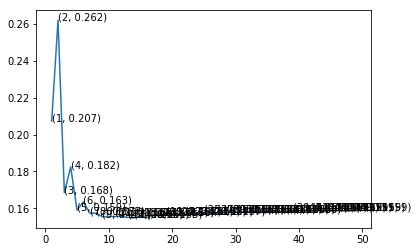

the misclassification error for each k value is :  [0.207 0.262 0.168 0.182 0.159 0.163 0.157 0.157 0.155 0.156 0.156 0.155
 0.155 0.156 0.155 0.156 0.156 0.157 0.157 0.157 0.157 0.157 0.158 0.157
 0.158 0.158 0.158 0.158 0.158 0.158 0.158 0.158 0.158 0.158 0.158 0.159
 0.159 0.159 0.159 0.159 0.159 0.159 0.159 0.159 0.159]


In [14]:
# creating odd list of K for KNN
myList = list(range(0,50))
neighbors = list(filter(lambda x: x % 10 != 0, myList))

# empty list that will hold cv scores
cv_scores = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k,algorithm='kd_tree' ,n_jobs=5)
    scores = cross_val_score(knn, X_1, y_1, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)

plt.plot(neighbors, MSE)

for xy in zip(neighbors, np.round(MSE,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

#plt.xlabel('Number of Neighbors K')
#plt.ylabel('Misclassification Error')
plt.show()

print("the misclassification error for each k value is : ", np.round(MSE,3))

In [25]:
    to_array()
dense_matrix    sparse.matrix.toarray()

In [15]:
optimal_k=14

In [76]:
from time import time

/home/dtewani/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


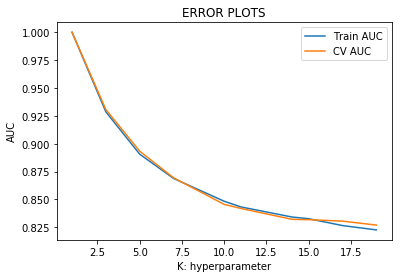

CPU times: user 1d 2h 14min 34s, sys: 19 s, total: 1d 2h 14min 53s
Wall time: 5h 24min 9s


In [13]:
%%time
from sklearn.preprocessing import label_binarize
train_auc = []
cv_auc = []
y2 = label_binarize(y_1, classes=['0.', '1.'])
ycv = label_binarize(y_cv, classes=['0.', '1.'])
#y2=y2.flatten()
K = [1,3,5,7,10,11,14,15,17,19]

for i in K:
    neigh = KNeighborsClassifier(n_neighbors=i,algorithm='kd_tree' ,n_jobs=5)
    neigh.fit(X_1, y_1)  
    y_train_pred =  neigh.predict_proba (X_1)[:,1]
    y_cv_pred =  neigh.predict_proba(X_cv)[:,1]
    train_auc.append(roc_auc_score(y_1,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))
    
plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show() 

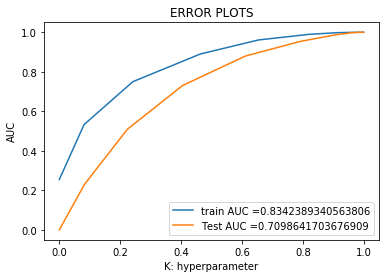

Train confusion matrix
[[  181  1935]
 [   24 11407]]
Test confusion matrix
[[  36  863]
 [  13 4895]]
CPU times: user 5h 40min 24s, sys: 4.45 s, total: 5h 40min 28s
Wall time: 1h 25min 51s


In [16]:
%%time
from sklearn.metrics import roc_curve, auc

#y2 = label_binarize(y_1, classes=['0.', '1.'])
#ycv = label_binarize(y_cv, classes=['0.', '1.'])
#y_test_1 = label_binarize(y_test, classes=['0.', '1.'])
neigh = KNeighborsClassifier(n_neighbors=optimal_k,algorithm='kd_tree' ,n_jobs=4)
neigh.fit(X_1, y_1)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

train_fpr, train_tpr, thresholds = roc_curve(y_1, neigh.predict_proba(X_1)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, neigh.predict_proba(X_test)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

print("="*100)

from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_1, neigh.predict(X_1)))
print("Test confusion matrix")
print(confusion_matrix(y_test, neigh.predict(X_test)))

In [18]:
%%time
# ============================== KNN with k = optimal_k ===============================================
# instantiate learning model k = optimal_k
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k,n_jobs=4)
print(knn_optimal)
# fitting the model
knn_optimal.fit(X_1, y_1)

# predict the response
pred = knn_optimal.predict(X_test)

# evaluate accuracy
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (optimal_k, acc))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=4, n_neighbors=14, p=2,
           weights='uniform')

The accuracy of the knn classifier for k = 14 is 84.914758%
CPU times: user 52min 49s, sys: 1.57 s, total: 52min 50s
Wall time: 13min 31s


TFIDF

In [25]:
tf_idf_vect = tfidf = TfidfVectorizer(strip_accents='unicode', analyzer='word', lowercase=True)
final_tf_idf = tf_idf_vect.fit_transform(final['clean'].values)
#dense_data_tf =final_tf_idf.toarray()X
#final_tf_idf 
#final_tf_idf = final_counts.to_array()
# sparse.matrix.toarray()
#final_tf_idf = final_counts.to_array()
#final_tf_idf=final_tf_idf.todense()
#todense()

In [26]:
count_tf=final_tf_idf.todense()

In [28]:
count_tf.shape

(19354, 16592)

In [29]:
# Part I
# ============================== data preprocessing ===========================================

# define column names
#names = ['x', 'y', 'class']
##names = ['x']
# loading training data
df = labels_1000
#print(df.head())
#df.head()
# create design matrix X and target vector y
y = np.array(df) # end index is exclusive
#y=df
#df.reshape((999,1))
#y = np.array(df['class']) # showing you two ways of indexing a pandas df
X=count_tf

In [30]:
# split the data set into train and test
X_1, X_test, y_1, y_test = cross_validation.train_test_split(X, y, test_size=0.3, random_state=0)

# split the train data set into cross validation train and cross validation test
X_tr, X_cv, y_tr, y_cv = cross_validation.train_test_split(X_1, y_1, test_size=0.3)

y.shape

(19354,)

In [31]:
%%time
for i in range(1,20,2):
    # instantiate learning model (k = 30)
    knn = KNeighborsClassifier(n_neighbors=i,algorithm='kd_tree', n_jobs=5)

    # fitting the model on crossvalidation train
    knn.fit(X_tr, y_tr)
    pred = knn.predict(X_cv)

    # evaluate CV accuracy
    acc = accuracy_score(y_cv, pred, normalize=True) * float(100)
    print('\nCV accuracy for k = %d is %d%%' % (i, acc))
knn = KNeighborsClassifier(1)
knn.fit(X_tr,y_tr)
pred = knn.predict(X_test)
acc = accuracy_score(y_test, pred, normalize=True) * float(100)
print('\n****Test accuracy for k = 1 is %d%%' % (acc))   


CV accuracy for k = 1 is 81%

CV accuracy for k = 3 is 85%

CV accuracy for k = 5 is 85%

CV accuracy for k = 7 is 86%

CV accuracy for k = 9 is 85%

CV accuracy for k = 11 is 85%

CV accuracy for k = 13 is 85%

CV accuracy for k = 15 is 85%

CV accuracy for k = 17 is 85%

CV accuracy for k = 19 is 85%

****Test accuracy for k = 1 is 81%
CPU times: user 5h 23min 15s, sys: 3.64 s, total: 5h 23min 18s
Wall time: 1h 26min 4s


nee [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
[0.18013691778574303, 0.15060276007816908, 0.14554013268058874, 0.1438527683618407, 0.14532689177038283, 0.14522234138810441, 0.14617170881475217, 0.14585418592607657, 0.14617010785702256, 0.14690877254726364]

The optimal number of neighbors is 7.


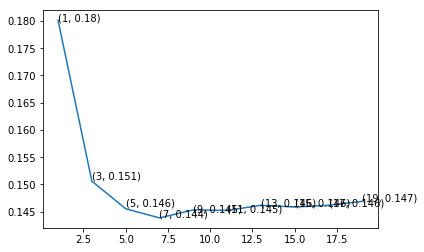

the misclassification error for each k value is :  [0.18  0.151 0.146 0.144 0.145 0.145 0.146 0.146 0.146 0.147]
CPU times: user 7min 19s, sys: 1min 44s, total: 9min 3s
Wall time: 11min 8s


In [32]:
%%time
# creating odd list of K for KNN
myList = list(range(0,20))
neighbors = list(filter(lambda x: x % 2 != 0, myList))
print("nee",neighbors)
# empty list that will hold cv scores
cv_scores = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k,algorithm='kd_tree', n_jobs=5)
    scores = cross_val_score(knn, X_tr, y_tr, cv=12, scoring='accuracy')
    cv_scores.append(scores.mean())
#    print('scores : ',scores)
#    print('knn : ',knn)

# changing to misclassification error
MSE = [1 - x for x in cv_scores]
print(MSE)
# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)

plt.plot(neighbors, MSE)

for xy in zip(neighbors, np.round(MSE,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

#plt.xlabel('Number of Neighbors K')
#plt.ylabel('Misclassification Error')
plt.show()

print("the misclassification error for each k value is : ", np.round(MSE,3))
optimal_k

/home/dtewani/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


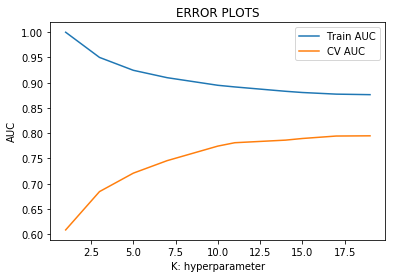

CPU times: user 15h 10min 8s, sys: 8.81 s, total: 15h 10min 17s
Wall time: 3h 5min 8s


In [33]:
%%time
from sklearn.preprocessing import label_binarize
train_auc = []
cv_auc = []
y2 = label_binarize(y_1, classes=['0.', '1.'])
ycv = label_binarize(y_cv, classes=['0.', '1.'])
#y2=y2.flatten()
#K = [1,3,5,7,9,10,11,13,15,17,19,20]
K = [1,3,5,7,10,11,14,15,17,19]
for i in K:
    neigh = KNeighborsClassifier(n_neighbors=i, algorithm='kd_tree' ,n_jobs=5)
    neigh.fit(X_tr, y_tr)  
    y_train_pred =  neigh.predict_proba (X_tr)[:,1]
    y_cv_pred =  neigh.predict_proba(X_cv)[:,1]
    train_auc.append(roc_auc_score(y_tr,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))
    
plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show() 

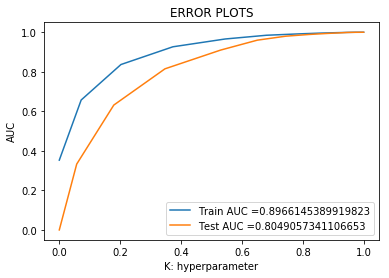

Train confusion matrix
[[ 1139  4163]
 [  226 26722]]
Test confusion matrix
[[  413  1877]
 [  131 11401]]


In [34]:
%%time
from sklearn.metrics import roc_curve, auc

#y2 = label_binarize(y_1, classes=['0.', '1.'])
#ycv = label_binarize(y_cv, classes=['0.', '1.'])
#y_test_1 = label_binarize(y_test, classes=['0.', '1.'])
neigh = KNeighborsClassifier(n_neighbors=optimal_k,algorithm='kd_tree', n_jobs=6)
neigh.fit(X_1, y_1)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

train_fpr, train_tpr, thresholds = roc_curve(y_1, neigh.predict_proba(X_1)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, neigh.predict_proba(X_test)[:,1])

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

print("="*100)

from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_1, neigh.predict(X_1)))
print("Test confusion matrix")
print(confusion_matrix(y_test, neigh.predict(X_test)))

In [36]:
%%time
# ============================== KNN with k = optimal_k ===============================================
# instantiate learning model k = optimal_k
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k, n_jobs=4)
print(knn_optimal)
# fitting the model
knn_optimal.fit(X_1, y_1)

# predict the response
pred = knn_optimal.predict(X_test)

# evaluate accuracy
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (optimal_k, acc))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=4, n_neighbors=7, p=2,
           weights='uniform')

The accuracy of the knn classifier for k = 7 is 86.206303%
CPU times: user 1h 31min 7s, sys: 909 ms, total: 1h 31min 8s
Wall time: 14min 41s


In [99]:
# Using Google News Word2Vectors
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

# in this project we are using a pretrained model by google
# its 3.3G file, once you load this into your memory 
# it occupies ~9Gb, so please do this step only if you have >12G of ram
# we will provide a pickle file wich contains a dict , 
# and it contains all our courpus words as keys and  model[word] as values
# To use this code-snippet, download "GoogleNews-vectors-negative300.bin" 
# from https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit
# it's 1.9GB in size.


model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

In [38]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

In [61]:
final['clean']

22621    b'dog love saw pet store tag attach regard mad...
22620    b'dog love chicken product china wont buy anym...
2546     b'product avail www amazon com victor trap unr...
2547     b'use victor fli bait season cant beat great p...
1145     b'receiv shipment could hard wait tri product ...
1146     b'realli good idea final product outstand use ...
8696     b'ive use brand year your feel clog ate massiv...
8695     b'good flavor uniqu tea ive tri tea effect cle...
8694     b'your new product need care dosag strong batc...
2942     b'glad cocker standard poodl puppi love stuff ...
2941     b'use food month find excel fact two dog coton...
1071     b'nine cat crazi kibbl last thing want cat foo...
5905     b'cat third favorit food great stuff gravi thi...
5906     b'anoth favorit hous cat doesnt want time mont...
5907     b'one great basic food whatev cat realli mine ...
5897     b'honest say wont buy varieti look bad smell b...
5896     b'cours nobodi ever figur cat like experi oppo.

In [163]:
# Train your own Word2Vec model using your own text corpus
import gensim
i=0
list_of_sent=[]
for sent in final['Text'].values:
 
    filtered_sentence=[]
    sent=cleanhtml(sent)
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if(cleaned_words.isalpha()):    
                filtered_sentence.append(cleaned_words.lower())
            else:
                continue 
    list_of_sent.append(filtered_sentence)
 

In [62]:
list_of_sent

[['our',
  'dogs',
  'just',
  'love',
  'them',
  'i',
  'saw',
  'them',
  'in',
  'a',
  'pet',
  'store',
  'and',
  'a',
  'tag',
  'was',
  'attached',
  'regarding',
  'them',
  'being',
  'made',
  'in',
  'china',
  'and',
  'it',
  'satisfied',
  'me',
  'that',
  'they',
  'were',
  'safe'],
 ['my',
  'dogs',
  'loves',
  'this',
  'chicken',
  'but',
  'its',
  'a',
  'product',
  'from',
  'china',
  'so',
  'we',
  'wont',
  'be',
  'buying',
  'it',
  'anymore',
  'its',
  'very',
  'hard',
  'to',
  'find',
  'any',
  'chicken',
  'products',
  'made',
  'in',
  'the',
  'usa',
  'but',
  'they',
  'are',
  'out',
  'there',
  'but',
  'this',
  'one',
  'isnt',
  'its',
  'too',
  'bad',
  'too',
  'because',
  'its',
  'a',
  'good',
  'product',
  'but',
  'i',
  'wont',
  'take',
  'any',
  'chances',
  'till',
  'they',
  'know',
  'what',
  'is',
  'going',
  'on',
  'with',
  'the',
  'china',
  'imports'],
 ['why',
  'is',
  'this',
  'when',
  'the',
  'same',


In [164]:
w2v_model=gensim.models.Word2Vec(list_of_sent,min_count=5,size=50, workers=4)  

In [165]:
sent_vectors = []; 
for sent in list_of_sent: 
    sent_vec = np.zeros(50)
    cnt_words =0; 
    for word in sent: 
        try:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
        except:
            pass
    sent_vec /= cnt_words
    sent_vectors.append(sent_vec)

sent_vec    

array([ 6.93863731e-01,  1.25355826e-01,  1.85118193e-01,  6.25451150e-02,
       -1.15430869e-01, -7.67748803e-04, -8.10971420e-02,  4.03957827e-01,
       -6.66197970e-01, -4.40506730e-01, -1.55394398e-01, -7.56877101e-01,
        3.29764780e-01,  1.39486402e-01,  7.68052307e-01, -8.21783906e-02,
       -5.15430470e-01,  2.06744631e-01,  2.56341417e-01,  6.98409008e-01,
       -7.27748473e-01,  2.23540735e-02, -2.09204277e-01,  5.22478789e-01,
       -3.63694794e-01,  3.03974675e-01, -3.81100843e-01,  2.26318757e-01,
        8.18261368e-01, -2.27028855e-01,  8.79207069e-02,  4.01091339e-01,
       -8.55370549e-01, -1.26573813e-01,  2.29072381e-01,  2.31895917e-01,
        7.31118560e-01,  2.00910685e-01, -2.00757148e-01, -3.96512041e-01,
       -5.19170006e-02,  2.58382297e-02, -7.94026394e-02,  4.50282566e-01,
        4.80993701e-01, -3.43711542e-01, -5.04842643e-01, -6.27881653e-02,
        4.92906410e-01, -1.48355830e-01])

In [67]:
X = sent_vectors #final_w2v_count
y = final['Score']

In [68]:
# split the data set into train and test
X_1, X_test, y_1, y_test = cross_validation.train_test_split(X, y, test_size=0.3, random_state=0)

# split the train data set into cross validation train and cross validation test
X_tr, X_cv, y_tr, y_cv = cross_validation.train_test_split(X_1, y_1, test_size=0.3)

y.shape

(28072,)

In [69]:
X_tr

[array([-0.16033844,  0.4162518 ,  0.00617147,  0.48957187,  0.02544906,
        -0.6510863 , -0.16846187, -0.36634245, -0.23549059, -0.63257731,
        -0.32682365, -0.61173279, -0.21689884,  0.02477202,  0.08998954,
        -0.25347302, -0.80124561, -0.03917879,  0.30427569,  0.38513888,
        -0.76380967,  0.37019902,  0.06485088,  0.37984745, -0.40503918,
        -0.31065921, -0.23833786,  0.34510042, -0.13755792,  0.02824174,
         0.5361382 , -0.00386062, -0.40339467,  0.30291244,  0.59211987,
         0.10838262,  0.28874542, -0.54834832,  0.277817  , -0.59434671,
        -0.1958553 ,  0.19534825, -0.01838505,  0.27721541, -0.01326583,
         0.03937108, -0.33959832, -0.17644582,  0.19627126, -0.23800344]),
 array([ 0.02781014,  0.46064473,  0.29280413,  0.57294894, -0.0499524 ,
        -0.66543655, -0.06726113, -0.31003974, -0.40707323, -0.58646667,
        -0.0928772 , -0.88982017, -0.22959294, -0.16021191,  0.19883688,
        -0.27607462, -0.57278136, -0.28048664,  0

In [70]:
%%time
myList = list(range(0,20))
neighbors = list(filter(lambda x: x % 2 != 0, myList))
for i in range(1,30,2):
    # instantiate learning model (k = 30)
    knn = KNeighborsClassifier(n_neighbors=i,algorithm='kd_tree', n_jobs=6)

    # fitting the model on crossvalidation train
    knn.fit(X_tr, y_tr)
    pred = knn.predict(X_cv)

    # evaluate CV accuracy
    acc = accuracy_score(y_cv, pred, normalize=True) * float(100)
    print('\nCV accuracy for k = %d is %d%%' % (i, acc))
knn = KNeighborsClassifier(1)
knn.fit(X_tr,y_tr)
pred = knn.predict(X_test)
acc = accuracy_score(y_test, pred, normalize=True) * float(100)
print('\n****Test accuracy for k = 1 is %d%%' % (acc))   


CV accuracy for k = 1 is 80%

CV accuracy for k = 3 is 83%

CV accuracy for k = 5 is 85%

CV accuracy for k = 7 is 85%

CV accuracy for k = 9 is 85%

CV accuracy for k = 11 is 85%

CV accuracy for k = 13 is 85%

CV accuracy for k = 15 is 86%

CV accuracy for k = 17 is 86%

CV accuracy for k = 19 is 86%

CV accuracy for k = 21 is 85%

CV accuracy for k = 23 is 85%

CV accuracy for k = 25 is 85%

CV accuracy for k = 27 is 85%

CV accuracy for k = 29 is 85%

****Test accuracy for k = 1 is 80%
CPU times: user 5min 35s, sys: 271 ms, total: 5min 36s
Wall time: 1min 9s



The optimal number of neighbors is 17.


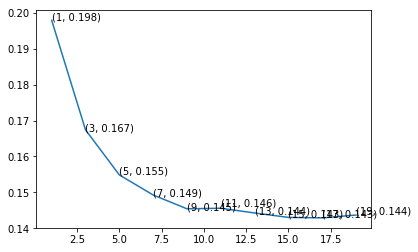

the misclassification error for each k value is :  [0.198 0.167 0.155 0.149 0.145 0.146 0.144 0.143 0.143 0.144]
CPU times: user 5min 45s, sys: 355 ms, total: 5min 46s
Wall time: 1min 17s


In [78]:
%%time
# creating odd list of K for KNN

myList = list(range(0,20))
neighbors = list(filter(lambda x: x % 2 != 0, myList))

# empty list that will hold cv scores
cv_scores = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k,algorithm='kd_tree', n_jobs=6)
    scores = cross_val_score(knn, X_tr, y_tr, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)

plt.plot(neighbors, MSE)

for xy in zip(neighbors, np.round(MSE,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

#plt.xlabel('Number of Neighbors K')
#plt.ylabel('Misclassification Error')
plt.show()

print("the misclassification error for each k value is : ", np.round(MSE,3))

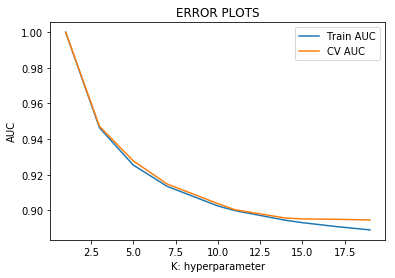

In [80]:
from sklearn.preprocessing import label_binarize
train_auc = []
cv_auc = []
#y2 = label_binarize(y_1, classes=['0.', '1.'])
#ycv = label_binarize(y_cv, classes=['0.', '1.'])
#y2=y2.flatten()
#K = [1,3,5,7,9,10,11,13,15,17,19,20,21,23,25,27,29,30]
K = [1,3,5,7,10,11,14,15,17,19]
for i in K:
    neigh = KNeighborsClassifier(n_neighbors=i, algorithm='kd_tree' ,n_jobs=6)
    neigh.fit(X_1, y_1)  
    y_train_pred =  neigh.predict_proba (X_1)[:,1]
    y_cv_pred =  neigh.predict_proba(X_cv)[:,1]
    train_auc.append(roc_auc_score(y_1,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))
    
plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()  

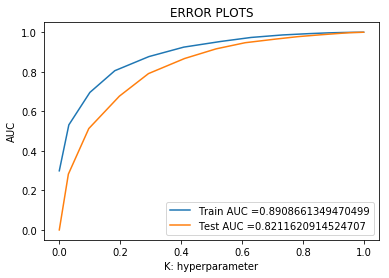

Train confusion matrix
[[  833  2292]
 [  226 16299]]
Test confusion matrix
[[ 289 1052]
 [ 157 6924]]
CPU times: user 5min 50s, sys: 1.98 s, total: 5min 52s
Wall time: 1min 2s


In [82]:
%%time
#y2 = label_binarize(y_1, classes=['0.', '1.'])
#ycv = label_binarize(y_cv, classes=['0.', '1.'])
#y_test_1 = label_binarize(y_test, classes=['0.', '1.'])

neigh = KNeighborsClassifier(n_neighbors=optimal_k, algorithm='kd_tree', n_jobs=6)
neigh.fit(X_1, y_1)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

train_fpr, train_tpr, thresholds = roc_curve(y_1, neigh.predict_proba(X_1)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, neigh.predict_proba(X_test)[:,1])

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

print("="*100)

from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_1, neigh.predict(X_1)))
print("Test confusion matrix")
print(confusion_matrix(y_test, neigh.predict(X_test)))


In [83]:
%%time
# ============================== KNN with k = optimal_k ===============================================
# instantiate learning model k = optimal_k
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k, algorithm='kd_tree')
print(knn_optimal)
# fitting the model
knn_optimal.fit(X_1, y_1)

# predict the response
pred = knn_optimal.predict(X_test)

# evaluate accuracy
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (optimal_k, acc))

KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=17, p=2,
           weights='uniform')

The accuracy of the knn classifier for k = 17 is 85.644740%
CPU times: user 21.4 s, sys: 3 ms, total: 21.4 s
Wall time: 20.8 s


In [ ]:
AVG word to VEC tfidf

In [182]:
from tqdm import tqdm
import numpy as np

In [130]:
final['Text']

22621    Our dogs just love them.  I saw them in a pet ...
22620    My dogs loves this chicken but its a product f...
2546     Why is this $[...] when the same product is av...
2547     We have used the Victor fly bait for 3 seasons...
1145     I just received my shipment and could hardly w...
1146     This was a really good idea and the final prod...
8696     I've used this brand for years. If you're feel...
8695     Good flavor, unique in all the teas that I've ...
8694     If you're new to this product you need to be v...
2942     I'm glad my 45lb cocker/standard poodle puppy ...
2941     We have been using this food for about 6 month...
1071     I have nine cats and they are crazy about thes...
5905     This is my cat's third favorite food.  It's gr...
5906     This is another favorite in our house.  My cat...
5907     This one is a great basic food. Whatever is in...
5897     I honestly have to say that I just won't buy t...
5896     Of course, nobody can ever figure out what cat.

In [131]:
tfidf = TfidfVectorizer(ngram_range=(1,2)) #Using bi-grams

tfidf_vec_new = tfidf.fit_transform(final['Text'].values)

print(tfidf_vec_new.shape)

features = tfidf.get_feature_names()

(28072, 521757)


In [133]:
tfidf_vec_new.data

array([0.07362116, 0.08373558, 0.05234001, ..., 0.19585636, 0.19585636,
       0.20368495])

In [ ]:
w2vec_model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

In [149]:
w2v_model=gensim.models.Word2Vec('GoogleNews-vectors-negative300.bin',min_count=5,size=50, workers=4)  

In [ ]:
i=0
list_of_sentance_train=[]
for sentance in X_1:
    list_of_sentance_train.append(final['clean'].values.split())

In [193]:
# average Word2Vec
# compute average word2vec for each review.
%%time
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in list_of_sent: # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
        except:
            pass
    sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
print(len(sent_vectors))
print(len(sent_vectors[0]))

9564
50


In [194]:
X_tr= sent_vectors

In [50]:
X_tr

[array([-0.1064815 ,  0.16436047, -0.04410253, -0.52584711,  0.61379579,
         0.46400374, -0.25421173, -0.17284562, -0.46591133,  0.26956193,
        -0.3380119 ,  0.6572187 , -0.70848532,  0.07656166,  0.65114631,
         0.35724931,  0.28564553,  0.0094913 ,  0.53350413, -0.1139092 ,
         0.25345553, -0.13743969, -0.24763091, -0.20698304,  1.01247773,
         0.22249513, -0.16495885,  0.49606271,  0.38089516,  0.66736106,
        -0.3804235 , -0.30532621,  0.18944063, -0.36938892,  0.63650187,
        -0.50262435,  0.42056008,  0.23923857, -0.56685438,  0.53420019,
        -0.28980781, -0.35080919, -0.3395608 ,  0.24447582,  0.12563217,
         0.34226165,  0.02254383,  0.0585171 ,  0.07065102,  1.16519133]),
 array([-6.04885949e-02, -4.84160271e-01,  3.00575500e-01, -5.41077161e-01,
         2.27967610e-02, -1.88061849e-01, -2.97439243e-01, -2.38023545e-01,
        -5.31359267e-01, -6.83242582e-02, -1.40929261e-01,  3.08399361e-01,
        -3.60908474e-01, -1.30957539e-01

In [196]:
%%time
for i in range(1,20,2):
    # instantiate learning model (k = 30)
    knn = KNeighborsClassifier(n_neighbors=i)

    # fitting the model on crossvalidation train
    knn.fit(X_tr, y_tr)
    pred = knn.predict(X_cv)

    # evaluate CV accuracy
    acc = accuracy_score(y_cv, pred, normalize=True) * float(100)
    print('\nCV accuracy for k = %d is %d%%' % (i, acc))
knn = KNeighborsClassifier(1)
knn.fit(X_tr,y_tr)
pred = knn.predict(X_test)
acc = accuracy_score(y_test, pred, normalize=True) * float(100)
print('\n****Test accuracy for k = 1 is %d%%' % (acc))   


CV accuracy for k = 1 is 78%

CV accuracy for k = 3 is 81%

CV accuracy for k = 5 is 82%

CV accuracy for k = 7 is 83%

CV accuracy for k = 9 is 83%

CV accuracy for k = 11 is 83%

CV accuracy for k = 13 is 83%

CV accuracy for k = 15 is 83%

CV accuracy for k = 17 is 83%

CV accuracy for k = 19 is 83%

CV accuracy for k = 21 is 83%

CV accuracy for k = 23 is 82%

CV accuracy for k = 25 is 82%

CV accuracy for k = 27 is 82%

CV accuracy for k = 29 is 82%

****Test accuracy for k = 1 is 79%



The optimal number of neighbors is 9.


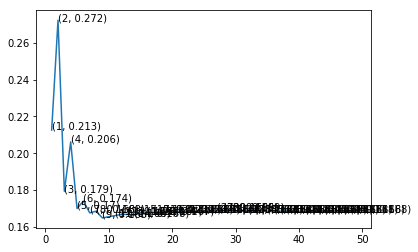

the misclassification error for each k value is :  [0.213 0.272 0.179 0.206 0.17  0.174 0.168 0.168 0.165 0.166 0.167 0.167
 0.166 0.168 0.167 0.168 0.167 0.168 0.168 0.168 0.168 0.168 0.168 0.168
 0.169 0.169 0.169 0.168 0.168 0.168 0.168 0.168 0.168 0.168 0.168 0.168
 0.168 0.168 0.168 0.168 0.168 0.168 0.168 0.168 0.168]


In [197]:
# creating odd list of K for KNN
%%time
myList = list(range(0,20))
neighbors = list(filter(lambda x: x % 2 != 0, myList))

# empty list that will hold cv scores
cv_scores = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_tr, y_tr, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)

plt.plot(neighbors, MSE)

for xy in zip(neighbors, np.round(MSE,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

#plt.xlabel('Number of Neighbors K')
#plt.ylabel('Misclassification Error')
plt.show()

print("the misclassification error for each k value is : ", np.round(MSE,3))

In [ ]:
from sklearn.preprocessing import label_binarize
train_auc = []
cv_auc = []
y2 = label_binarize(y_1, classes=['0.', '1.'])
ycv = label_binarize(y_cv, classes=['0.', '1.'])
#y2=y2.flatten()
K = [1,3,7,5,10,15,17]

for i in K:
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_1, y_1)  
    y_train_pred =  neigh.predict_proba (X_1)[:,1]
    y_cv_pred =  neigh.predict_proba(X_cv)[:,1]
    train_auc.append(roc_auc_score(y_1,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))
    
plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show() 

In [ ]:
from sklearn.metrics import roc_curve, auc

#y2 = label_binarize(y_1, classes=['0.', '1.'])
#ycv = label_binarize(y_cv, classes=['0.', '1.'])
#y_test_1 = label_binarize(y_test, classes=['0.', '1.'])
neigh = KNeighborsClassifier(n_neighbors=7)
neigh.fit(X_1, y_1)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

train_fpr, train_tpr, thresholds = roc_curve(y_1, neigh.predict_proba(X_1)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, neigh.predict_proba(X_test)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="train AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

print("="*100)

from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_1, neigh.predict(X_1)))
print("Test confusion matrix")
print(confusion_matrix(y_test, neigh.predict(X_test)))

In [ ]:
# ============================== KNN with k = optimal_k ===============================================
# instantiate learning model k = optimal_k
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
print(knn_optimal)
# fitting the model
knn_optimal.fit(X_1, y_1)

# predict the response
pred = knn_optimal.predict(X_test)

# evaluate accuracy
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (optimal_k, acc))

In [158]:
# average Word2Vec
# compute average word2vec for each review.
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in list_of_sent: # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
        except:
            pass
    sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
print(len(sent_vectors))
print(len(sent_vectors[0]))

/home/dtewani/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


28072
50


In [181]:
# TF-IDF weighted Word2Vec
tfidf_feat = tf_idf_vect.get_feature_names() # tfidf words/col-names
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf

tfidf_sent_vectors = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in list_of_sent: # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = w2v_model.wv[word]
            # obtain the tf_idfidf of a word in a sentence/review
            tfidf = final_tf_idf[row, tfidf_feat.index(word)]
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
        except:
            pass
    sent_vec /= weight_sum
    tfidf_sent_vectors.append(sent_vec)
    row += 1
    

/home/dtewani/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


In [8]:
# Using Google News Word2Vectors
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

# in this project we are using a pretrained model by google
# its 3.3G file, once you load this into your memory 
# it occupies ~9Gb, so please do this step only if you have >12G of ram
# we will provide a pickle file wich contains a dict , 
# and it contains all our courpus words as keys and  model[word] as values
# To use this code-snippet, download "GoogleNews-vectors-negative300.bin" 
# from https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit
# it's 1.9GB in size.


model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

In [10]:
# Train your own Word2Vec model using your own text corpus
import gensim
i=0
list_of_sent=[]
for sent in final['Text'].values:
 
    filtered_sentence=[]
    sent=cleanhtml(sent)
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if(cleaned_words.isalpha()):    
                filtered_sentence.append(cleaned_words.lower())
            else:
                continue 
    list_of_sent.append(filtered_sentence)

In [12]:
w2v_model=gensim.models.Word2Vec(list_of_sent,min_count=5,size=50, workers=4) 

In [13]:
# average Word2Vec
# compute average word2vec for each review.
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in list_of_sent: # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
        except:
            pass
    sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
print(len(sent_vectors))
print(len(sent_vectors[0]))

28072
50


In [14]:
sent_vectors

[array([-3.79219144e-01, -2.83761157e-01,  4.26566140e-01,  6.26153000e-01,
        -5.67653969e-01, -1.25065601e-01,  2.35511372e-01, -4.02912903e-01,
        -5.26044387e-01, -6.60383929e-02,  6.40702678e-02,  1.76596032e-01,
        -4.51420521e-01,  9.99860147e-02, -1.84205605e-01,  2.21791557e-01,
         3.11914575e-01, -5.12089850e-01,  9.94012308e-02,  5.19537367e-02,
         1.78968049e-01,  1.21213544e-03,  1.53226400e-01,  2.14704414e-01,
        -2.55401185e-01, -4.15901097e-01, -6.34318105e-01, -3.77690591e-01,
        -1.73954062e-02, -4.98199221e-01,  4.09980930e-01, -5.93035167e-01,
         1.24684125e+00, -1.42660611e-01, -3.96683565e-01,  4.76908212e-01,
        -1.45208459e-01, -7.45768361e-01,  7.97320568e-02,  3.08527757e-01,
        -7.65545586e-01,  3.76035773e-01, -5.42519967e-01,  4.06785927e-01,
         4.33986493e-01,  4.30672482e-01, -1.57645489e-01,  5.43434464e-01,
        -9.38424649e-01,  3.83249209e-01]),
 array([ 0.04972031, -0.47744993,  0.5640318

In [16]:
tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
final_tf_idf = tf_idf_vect.fit_transform(final['Text'].values)

In [ ]:
# TF-IDF weighted Word2Vec
tfidf_feat = tf_idf_vect.get_feature_names() # tfidf words/col-names
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf

tfidf_sent_vectors = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in list_of_sent: # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = w2v_model.wv[word]
            # obtain the tf_idfidf of a word in a sentence/review
            tfidf = final_tf_idf[row, tfidf_feat.index(word)]
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
        except:
            pass
    sent_vec /= weight_sum
    tfidf_sent_vectors.append(sent_vec)
    row += 1

/home/dtewani/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


In [15]:
# Using Google News Word2Vectors
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

# in this project we are using a pretrained model by google
# its 3.3G file, once you load this into your memory 
# it occupies ~9Gb, so please do this step only if you have >12G of ram
# we will provide a pickle file wich contains a dict , 
# and it contains all our courpus words as keys and  model[word] as values
# To use this code-snippet, download "GoogleNews-vectors-negative300.bin" 
# from https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit
# it's 1.9GB in size.


model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)


In [16]:
# Train your own Word2Vec model using your own text corpus
import gensim
i=0
list_of_sent=[]
for sent in final['Text']:
 
    filtered_sentence=[]
    sent=cleanhtml(sent)
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if(cleaned_words.isalpha()):    
                filtered_sentence.append(cleaned_words.lower())
            else:
                continue 
    list_of_sent.append(filtered_sentence)

In [17]:
w2v_model=gensim.models.Word2Vec(list_of_sent,min_count=2,size=50, workers=4)  

In [18]:
tf_idf_vect = TfidfVectorizer(min_df=2,max_features=50)
final_tf_idf = tf_idf_vect.fit_transform(final['Text'].values)

In [19]:
# TF-IDF  Word2Vec
tfidf_feat = tf_idf_vect.get_feature_names() # tfidf words/col-names

# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf

tfidf_sent_vectors = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in list_of_sent: # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = w2v_model.wv[word]
            
            # obtain the tf_idfidf of a word in a sentence/review
            
            
            tfidf = final_tf_idf[row, tfidf_feat.index(word)]
           
            
            sent_vec = (vec * tfidf)
            
            #time.sleep(10)      
        except:
            pass
    
    tfidf_sent_vectors.append(sent_vec)
#    print(tfidf_sent_vectors)
    row += 1

In [20]:
X = tfidf_sent_vectors #final_w2v_count
y = final['Score']

In [21]:
# split the data set into train and test
X_1, X_test, y_1, y_test = cross_validation.train_test_split(X, y, test_size=0.3, random_state=0)

# split the train data set into cross validation train and cross validation test
X_tr, X_cv, y_tr, y_cv = cross_validation.train_test_split(X_1, y_1, test_size=0.3)

In [22]:
for i in range(1,30,2):
    # instantiate learning model (k = 30)
    knn = KNeighborsClassifier(n_neighbors=i,algorithm='kd_tree', n_jobs=6)

    # fitting the model on crossvalidation train
    knn.fit(X_tr, y_tr)
    pred = knn.predict(X_cv)

    # evaluate CV accuracy
    acc = accuracy_score(y_cv, pred, normalize=True) * float(100)
    print('\nCV accuracy for k = %d is %d%%' % (i, acc))
knn = KNeighborsClassifier(1)
knn.fit(X_tr,y_tr)
pred = knn.predict(X_test)
acc = accuracy_score(y_test, pred, normalize=True) * float(100)
print('\n****Test accuracy for k = 1 is %d%%' % (acc))  


CV accuracy for k = 1 is 71%

CV accuracy for k = 3 is 77%

CV accuracy for k = 5 is 81%

CV accuracy for k = 7 is 82%

CV accuracy for k = 9 is 81%

CV accuracy for k = 11 is 82%

CV accuracy for k = 13 is 82%

CV accuracy for k = 15 is 82%

CV accuracy for k = 17 is 82%

CV accuracy for k = 19 is 83%

CV accuracy for k = 21 is 83%

CV accuracy for k = 23 is 83%

CV accuracy for k = 25 is 83%

CV accuracy for k = 27 is 83%

CV accuracy for k = 29 is 83%

****Test accuracy for k = 1 is 74%


In [23]:
# creating odd list of K for KNN
myList = list(range(0,30))
neighbors = list(filter(lambda x: x % 2 != 0, myList))

# empty list that will hold cv scores
cv_scores = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k, n_jobs=6)
    scores = cross_val_score(knn, X_tr, y_tr, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]


The optimal number of neighbors is 21.


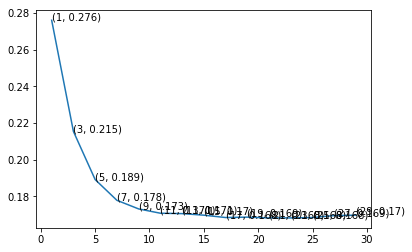

the misclassification error for each k value is :  [0.276 0.215 0.189 0.178 0.173 0.171 0.171 0.17  0.168 0.169 0.168 0.168
 0.168 0.169 0.17 ]


In [24]:
# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)

plt.plot(neighbors, MSE)

for xy in zip(neighbors, np.round(MSE,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

#plt.xlabel('Number of Neighbors K')
#plt.ylabel('Misclassification Error')
plt.show()

print("the misclassification error for each k value is : ", np.round(MSE,3))

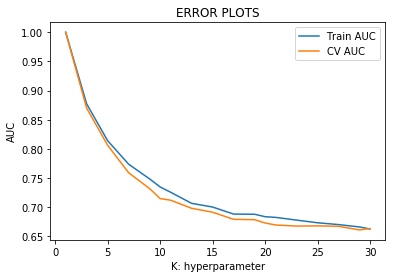

In [26]:
from sklearn.preprocessing import label_binarize
train_auc = []
cv_auc = []
#y2 = label_binarize(y_1, classes=['0.', '1.'])
#ycv = label_binarize(y_cv, classes=['0.', '1.'])
#y2=y2.flatten()
K = [1,3,5,7,9,10,11,13,15,17,19,20,21,23,25,27,29,30]

for i in K:
    neigh = KNeighborsClassifier(n_neighbors=i,algorithm='kd_tree', n_jobs=6)
    neigh.fit(X_1, y_1)  
    y_train_pred =  neigh.predict_proba (X_1)[:,1]
    y_cv_pred =  neigh.predict_proba(X_cv)[:,1]
    train_auc.append(roc_auc_score(y_1,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))
    
plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()  


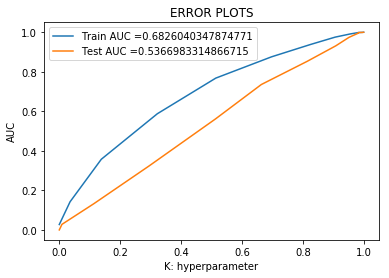

Train confusion matrix
[[  20 1110]
 [  10 5554]]
Test confusion matrix
[[   8  450]
 [   6 2406]]


In [27]:
#y2 = label_binarize(y_1, classes=['0.', '1.'])
#ycv = label_binarize(y_cv, classes=['0.', '1.'])
#y_test_1 = label_binarize(y_test, classes=['0.', '1.'])
neigh = KNeighborsClassifier(n_neighbors=optimal_k,algorithm='kd_tree', n_jobs=6)
neigh.fit(X_1, y_1)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

train_fpr, train_tpr, thresholds = roc_curve(y_1, neigh.predict_proba(X_1)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, neigh.predict_proba(X_test)[:,1])

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

print("="*100)

from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_1, neigh.predict(X_1)))
print("Test confusion matrix")
print(confusion_matrix(y_test, neigh.predict(X_test)))


In [28]:
# ============================== KNN with k = optimal_k ===============================================
# instantiate learning model k = optimal_k
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k,algorithm='kd_tree')
print(knn_optimal)
# fitting the model
knn_optimal.fit(X_1, y_1)

# predict the response
pred = knn_optimal.predict(X_test)

# evaluate accuracy
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (optimal_k, acc))

KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=21, p=2,
           weights='uniform')

The accuracy of the knn classifier for k = 21 is 84.111498%
